# 프로젝트 1 : 직접 고른 이미지로 SRGAN 실험하기
   ###   프로젝트 1-1.

(960, 540, 3)


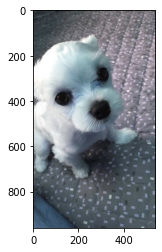

In [36]:
import cv2
import os
import matplotlib.pyplot as plt

img_path = os.getenv('HOME')+'/aiffel/hoon.png'  
img_orig = cv2.imread(img_path) 
print(img_orig.shape)
plt.imshow(img_orig)
plt.show()

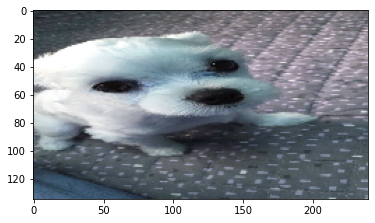

In [6]:
bicubic_image = cv2.resize(
    img_orig, 
    dsize=(240, 135), # (가로 픽셀 수, 세로 픽셀 수) → 위의 픽셀에서 1/4로 줄임
    interpolation=cv2.INTER_CUBIC # bicubic interpolation 적용
)
plt.imshow(bicubic_image)

In [44]:
import tensorflow as tf
import os

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [8]:
import tensorflow_datasets as tfds
import numpy as np

train, valid = tfds.load(
    "div2k/bicubic_x4", 
    split=["train","validation"],
    as_supervised=True
)

EXTRACTING {'train_lr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip', 'valid_lr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X4.zip', 'train_hr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip', 'valid_hr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip'}


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/800 [00:00<?, ? examples/s]

Shuffling div2k-train.tfrecord...:   0%|          | 0/800 [00:00<?, ? examples/s]

Generating validation examples...:   0%|          | 0/100 [00:00<?, ? examples/s]

Shuffling div2k-validation.tfrecord...:   0%|          | 0/100 [00:00<?, ? examples/s]

Dataset div2k downloaded and prepared to /aiffel/tensorflow_datasets/div2k/bicubic_x4/2.0.0. Subsequent calls will reuse this data.


In [21]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

srgan = apply_srgan(bicubic_image)

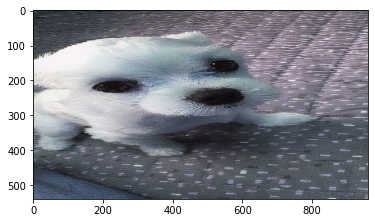

In [22]:
plt.imshow(srgan)

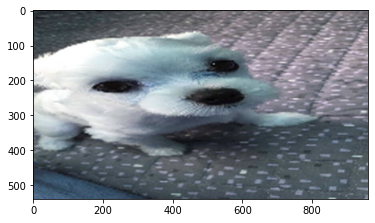

In [23]:
image = cv2.resize(
    bicubic_image, 
    dsize=(960, 540), # (가로 픽셀 수, 세로 픽셀 수)
    interpolation=cv2.INTER_CUBIC # bicubic interpolation 적용
)
plt.imshow(image)

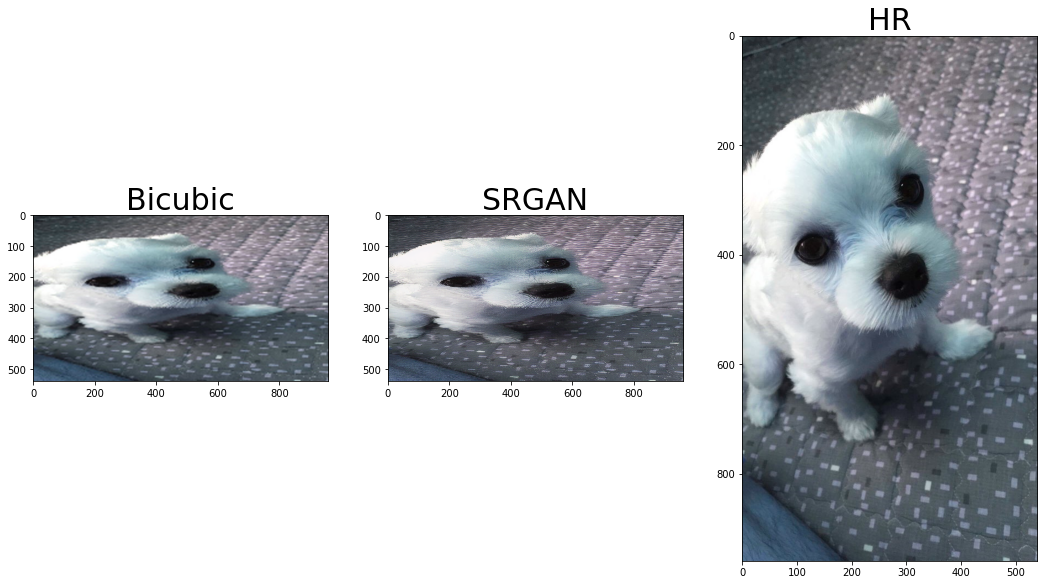

In [24]:
images = [image, srgan, img_orig]
labels = ["Bicubic", "SRGAN", "HR"]

plt.figure(figsize=(18,18))
for i in range(3):
    plt.subplot(1,3,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)

In [27]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

print("**SRGAN과 HR(원본) 비교**")
print("PSNR :", peak_signal_noise_ratio(image, srgan))
print("SSIM :", structural_similarity(image, srgan, multichannel=True))

**SRGAN과 HR(원본) 비교**
PSNR : 20.996594059931915
SSIM : 0.4228216120942614


### 프로젝트 1-2

(640, 480, 3)


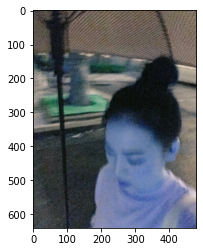

In [28]:
img_path = os.getenv('HOME')+'/aiffel/blur.png'  
img2 = cv2.imread(img_path) 
print(img2.shape)
plt.imshow(img2)
plt.show()

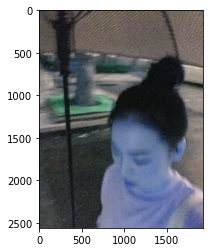

In [47]:
srgan = tf.keras.models.load_model(model_file)
srgan2 = apply_srgan(img2)
plt.imshow(srgan2)

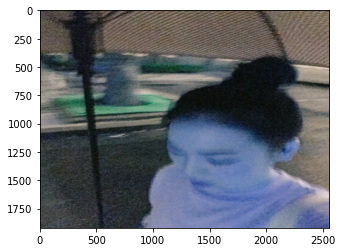

In [41]:
bicubic = cv2.resize(
    img2, 
    dsize=(2560,1920), # (가로 픽셀 수, 세로 픽셀 수) 
    interpolation=cv2.INTER_CUBIC # bicubic interpolation 적용
)
plt.imshow(bicubic)

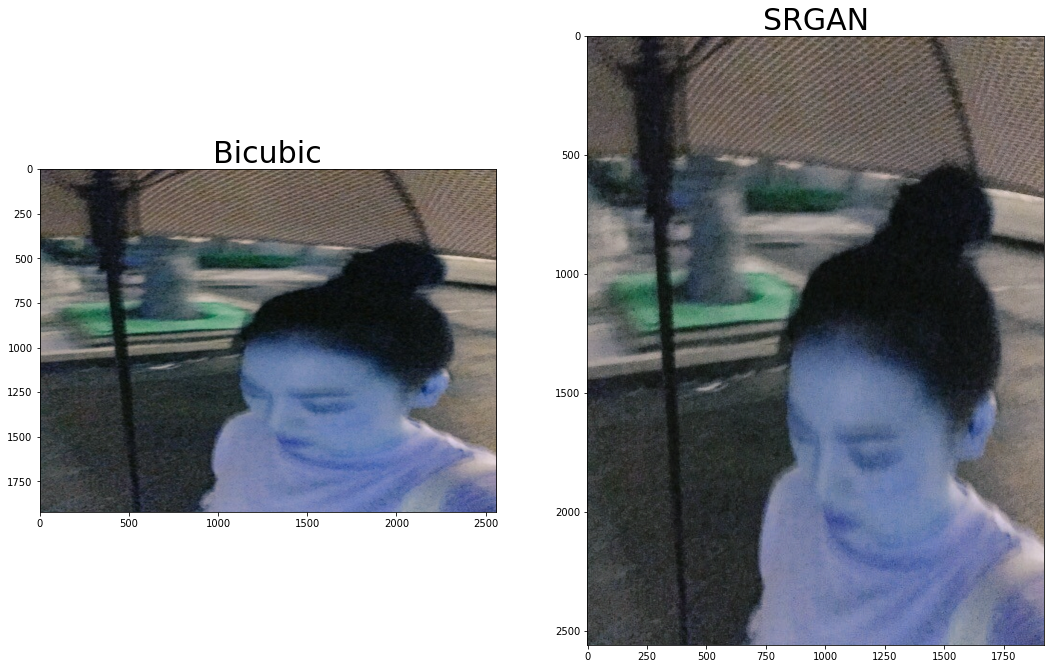

In [42]:
images = [bicubic, srgan2]
labels = ["Bicubic", "SRGAN"]

plt.figure(figsize=(18,18))
for i in range(2):
    plt.subplot(1,2,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)